In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## Set Up the DataBase

In [7]:
# read the csv file from local and skip the not necessary infomation in the file

# Covid Cases
Covid_Cases = pd.read_csv('./data/COVID-19 Cases by Daily Count.csv', skiprows= [0,1,2,3,4])
Covid_Cases = Covid_Cases.rename({'Data': 'Cases'}, axis=1)

# Covid Hospitalizations
Covid_Hospitalizations = pd.read_csv('./data/COVID-19 Hospitalizations by Daily Count.csv', 
                                     skiprows= [0,1,2,3,4])
Covid_Hospitalizations = Covid_Hospitalizations.rename({'Data': 'Hospitalizations'}, axis=1)
# Covid Deaths
Covid_Deaths = pd.read_csv('./data/COVID-19 Deaths by Daily Count.csv', skiprows= [0,1,2,3,4])
Covid_Deaths = Covid_Deaths.rename({'Data': 'Deaths'}, axis=1)
# Merge three datasets into one 
Covid = pd.merge(Covid_Cases, Covid_Hospitalizations,on = [ "TimeFrame","Location","Fips"] )

Covid = pd.merge(Covid, Covid_Deaths,on = [ "TimeFrame","Location","Fips"] )
#exclube NYC
Covid = Covid[Covid['Location'] != 'New York City']
# Get the features
features = ['Cases','Hospitalizations','Deaths']

Covid.head()

,Location,TimeFrame,DataFormat_x,Cases,Fips,DataFormat_y,Hospitalizations,DataFormat,Deaths
0,New York City,04/02,Number,5747,3651000,Number,1733,Number,498
1,New York City,04/06,Number,6353,3651000,Number,1805,Number,575
2,New York City,04/10,Number,4511,3651000,Number,1395,Number,539
3,New York City,04/13,Number,3312,3651000,Number,1264,Number,570
4,New York City,04/17,Number,3585,3651000,Number,897,Number,384
...,...,...,...,...,...,...,...,...,...
259,Staten Island,11/12,Number,162,36085,Number,10,Number,2
260,Staten Island,11/19,Number,200,36085,Number,20,Number,0
261,Staten Island,11/26,Number,91,36085,Number,19,Number,2
262,Staten Island,12/03,Number,328,36085,Number,34,Number,3


In [30]:
# Set up the target or y for LDA training 
y = Covid.loc[:,['Location']].values
y
# Target name
targets = ['New York City','Bronx','Brooklyn','Manhattan','Queens','Staten Island']
for n in range(0,len(y)):
    if y[n] == targets[0]:
        y[n] = 0
    elif y[n] == targets[1]:
        y[n] = 1
    elif y[n] == targets[2]:
        y[n] = 2
    elif y[n] == targets[3]:
        y[n] = 3
    elif y[n] == targets[4]:
        y[n] = 4
    elif y[n] == targets[5]:
        y[n] = 5

# set to contiguous flattened array
y = y.ravel()
# set the data type to integer
y = y.astype('int')


explained variance ratio (first two components): [0.98993755 0.0093144 ]
[0.98993755 0.99925196]


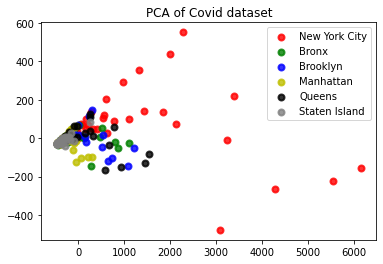

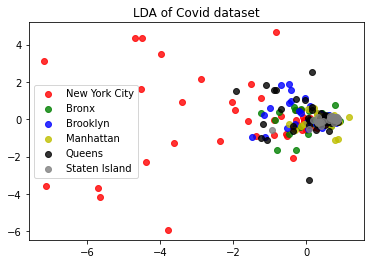

In [32]:
# Separate the features from the dataset
X = Covid.loc[:,features].values

target_names = targets
# Principal component analysis
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_.cumsum())
plt.figure()
colors = ['r', 'g', 'b', 'y', 'black','grey']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4 ,5], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Covid dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3 ,4,5], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Covid dataset')

plt.show()



# PCA chenck the most variance of Data
# LDA try to Maximize the separation of each class
